# Project: Cracking the Code of "Outstanding" Coffee
### Research question : "Which sensory attribute ('Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body','Balance') is the strongest predictor of a '90+ Point' (Outstanding) coffee rating?"

In [1]:
import pandas as pd

raw = pd.read_csv('arabica_data.csv')

# using only relevant columns that answers the question
col = ['Country.of.Origin', 'Region', 'Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
        'Balance', 'Total.Cup.Points','Grading.Date']

# creating a table of only valid content
coffee = raw[col].copy()

# Renaming 
coffee.columns = ['Country', 'Region', 'Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                   'Balance', 'Score','Date']

# checking first 5 rows
coffee.head()


,Country,Region,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Score,Date
0,Ethiopia,guji-hambela,1950-2200,8.67,8.83,8.67,8.75,8.50,8.42,90.58,"April 4th, 2015"
1,Ethiopia,guji-hambela,1950-2200,8.75,8.67,8.50,8.58,8.42,8.42,89.92,"April 4th, 2015"
2,Guatemala,NaN,1600 - 1800 m,8.42,8.50,8.42,8.42,8.33,8.42,89.75,"May 31st, 2010"
3,Ethiopia,oromia,1800-2200,8.17,8.58,8.42,8.42,8.50,8.25,89.00,"March 26th, 2015"
4,Ethiopia,guji-hambela,1950-2200,8.25,8.50,8.25,8.50,8.42,8.33,88.83,"April 4th, 2015"


* Data has loaded and filtered correctly
* I noticed that in Altitude column there are entries that are range instead of a single number, needs cleaning
to be able to perform accurate analysis
* I notice an NaN value, suggesting more potential Nan values

In [2]:
# estimating the data boundary
coffee.shape

(1311, 11)

In [3]:

coffee.info()

<class 'pandas.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     1310 non-null   str    
 1   Region      1254 non-null   str    
 2   Altitude    1088 non-null   str    
 3   Aroma       1311 non-null   float64
 4   Flavor      1311 non-null   float64
 5   Aftertaste  1311 non-null   float64
 6   Acidity     1311 non-null   float64
 7   Body        1311 non-null   float64
 8   Balance     1311 non-null   float64
 9   Score       1311 non-null   float64
 10  Date        1311 non-null   str    
dtypes: float64(7), str(4)
memory usage: 112.8 KB


* 'Region' and 'Altitude' seems to be having a large amount of null values
* 'Altitude' column seems to be string (mostly because of range values), need to convert into numericals for calculations

In [4]:
#summary statistics
coffee.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Score
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,82.115927
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,3.515761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,81.170000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,82.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,83.670000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,90.580000


* looking at the mean value of 'Score' i can tell that most of the coffee in the dataset is high quality, as in the coffee world anything above the score of 80 is graded as special
* Standard deviation suggests that the scores are not all over the place
* 25% of the coffee is "lower tier" (scoring between 0 and 81.17)
* median is 82.50 for scores, meaning half of the coffee in the database is better than a 82.5
* since 75% mark is only 83.67 and max being 90.58, it means that getting a score of 90 is difficult
* 'Body' cannot be 0, but since min value of body is 0 there is  likely a unnecessary entry

In [5]:
#inspecting the last 5 rows
coffee.tail()

,Country,Region,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Score,Date
1306,Mexico,juchique de ferrer,900,7.08,6.83,6.25,7.42,7.25,6.75,68.33,"September 17th, 2012"
1307,Haiti,"department d'artibonite , haiti",~350m,6.75,6.58,6.42,6.67,7.08,6.67,67.92,"May 24th, 2012"
1308,Nicaragua,jalapa,1100,7.25,6.58,6.33,6.25,6.42,6.08,63.08,"June 6th, 2017"
1309,Guatemala,nuevo oriente,4650,7.50,6.67,6.67,7.67,7.33,6.67,59.83,"May 24th, 2012"
1310,Honduras,comayagua,1400,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"April 28th, 2017"


* the last row confirms my observation from before, this is incomplete, delete these later
* another inconsitency in 'Altitude' can be noticed here

In [6]:
# CLEANING DATA

In [7]:
#converting date to python's format
coffee['Date'] = pd.to_datetime(coffee['Date'], format = 'mixed')

In [8]:
#eliminating all the incomplete values (the entries that were just '0')
filtered_coffee  = coffee[coffee['Score'] > 0]

before_filter_count = len(coffee)
after_filter_count = len(filtered_coffee)
print(f"Removed {before_filter_count - after_filter_count} invalid rows and now the dataset size is {len(filtered_coffee)}")


Removed 1 invalid rows and now the dataset size is 1310


In [9]:
# now lets remove the country value thats Null (observed from 'info()')
filtered_coffee= filtered_coffee.dropna(subset=['Country'])
print(f"After removing the NA values in 'Country' our dataset size is {len(filtered_coffee)}")

After removing the NA values in 'Country' our dataset size is 1309


In [10]:
#lets fill the missing values in 'Region'
filtered_coffee['Region']= filtered_coffee['Region'].fillna('Unknown')

# 1. i noticed  in the 'Region' column there are also entries that are not in english, lets fix that
# 2. the below code when encounters a character that is not in the english alphabet it deletes it and moves to the 
###  character in the word .
# 3. and when it encounters a word that is not fully in english, it deletes the whole word and replaces it with 'Unknown'

filtered_coffee['Region'] = filtered_coffee['Region'].str.encode('ascii', 'ignore').str.decode('ascii')

filtered_coffee['Region'] = filtered_coffee['Region'].replace('', 'Unknown')

print("Check the results:")
print(filtered_coffee['Region'].unique()[:15])

Check the results:
<StringArray>
[               'guji-hambela',                     'Unknown',
                      'oromia',                     'oromiya',
 'snnp/kaffa zone,gimbowereda',                   'antioquia',
                        'kona',                    'sulawesi',
                 'yirgacheffe',                      'yunnan',
                       'gedio',                   'san ramon',
                      'xalapa',                      'sidamo',
              'south of minas']
Length: 15, dtype: str


In [11]:
# now cleaning the 'Altitude' column
#i notice that  the dataset already has the average of altitude calculated, hence im importing it to the current dataset
filtered_coffee['Altitude'] = pd.to_numeric(raw['altitude_mean_meters'], errors='coerce')

#any altitude higher than 4000 is too high and any altitude lower than 0 is too low, both are not possible realistically
#so lets remove the outliers
filtered_coffee = filtered_coffee[(filtered_coffee['Altitude']>0) & (filtered_coffee['Altitude']<4000)]

print(f"Data Cleanin Process Completed")
print(f"The final data set size is : {len(filtered_coffee)}")

Data Cleanin Process Completed
The final data set size is : 1077


In [12]:
#Analysis

In [13]:
# Analysis 1: Group by Country and find the average Score
top_countries = filtered_coffee.groupby('Country')['Score'].mean().sort_values(ascending = False)
print("Top 10 countries by average of score")
print(top_countries.head(10))

Top 10 countries by average of score
Country
United States (Hawaii)    86.960000
United States             85.978750
Ethiopia                  85.916333
Papua New Guinea          85.750000
Japan                     84.670000
Kenya                     84.271304
Uganda                    84.004167
Ecuador                   83.830000
Panama                    83.707500
Colombia                  83.226667
Name: Score, dtype: float64


##### Interpretation
* This table shows us the expected quality of the coffee if you were dropped on the listed countries, for example if you were to buy a coffee from japan the average quality score of the coffee would be 84.67
* This shows us that Hawaii and United Statess are leading the dataset with average scores more than 85

In [14]:
# Analysis 2: Which countries are the most consistent?
country_consistency = filtered_coffee.groupby('Country')['Score'].std().sort_values()

print("Most Consistent Countries (Lowest Variation in Score):")
print(country_consistency.head(10))

Most Consistent Countries (Lowest Variation in Score):
Country
Myanmar                         0.531099
Malawi                          0.593192
Laos                            0.931254
Vietnam                         1.064219
Colombia                        1.074978
Tanzania, United Republic Of    1.089577
Uganda                          1.348474
United States (Hawaii)          1.357645
Peru                            1.414214
Brazil                          1.462528
Name: Score, dtype: float64


##### Interpretation
* A lower Standard Deviation is observed in Myanmar,Malawi,and laos means that they have a consistent coffee quality, meaning if you go and buy 10 different coffee bags from these countries, the quality across those bags will be consistent
* Myanmar wins the consistency race
* While Myanmar wins on consistency, Colombia is more impressive. It maintains a low SD (1.07) and a strong average score (83.22).

In [15]:
#Analysis 3 - Correlation between Altitude and Score
correlation = filtered_coffee['Altitude'].corr(filtered_coffee['Score'])

print(f"Correlation between Altitude and Score : {correlation : .3f} ")

Correlation between Altitude and Score :  0.162 


##### Interpretation
* Altitude and Score are positively related meaning higher the altitude better the coffee. Meaning taller mountains produce better quality coffee
* However the correlation between altitude and score is weak. Altitude does impact the quality of the coffee, it is not the only determining factor.

In [16]:
# Analysis 4 - Which sensory trait is the leader?
sensory_traits = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
Sensory_correlation = filtered_coffee[sensory_traits].corrwith(filtered_coffee['Score'])
Sensory_correlation = Sensory_correlation.sort_values(ascending= False)

print("The correlation of each sensory trait with score")
print(Sensory_correlation)

The correlation of each sensory trait with score
Flavor        0.843824
Aftertaste    0.839250
Balance       0.785688
Acidity       0.715617
Aroma         0.696942
Body          0.683735
dtype: float64


##### Interpretation
* We notince a strong positive correlation between all the traits and score. We can conclude that Flavor and Aftertaste are the two primary drivers to a high quality coffee.
* Body has the lowest correlation among the sensory traits. While still important, it suggests that a coffee's weight or mouthfeel is less influential on the overall score .
* So for a Coffee producer aiming to improve their market value, I would advise to focus on improving the flavor and aftertaste than focusing purely on Aroma and Body to yield a higher return.

In [17]:
#Analysis 5 - Average Score Trends over the Years
yearly_trends = filtered_coffee.groupby(filtered_coffee['Date'].dt.year)['Score'].mean()

print("Average Coffee Score by Year:")
print(yearly_trends)

Average Coffee Score by Year:
Date
2010    84.881364
2011    82.996909
2012    81.351896
2013    82.052000
2014    82.011724
2015    82.842989
2016    83.032604
2017    82.150924
2018    83.165000
Name: Score, dtype: float64


* The data shows that 2010 had the highest average score, followed by a significant drop in 2012. Since 2012, the quality has remained stable comparitively, around the 82 – 83 range.

* There is no clear "upward line" showing that coffee is getting better every year. Instead, the quality seems to fluctuate

In [18]:
# Visialization

C:\Users\Akhil\AppData\Local\Temp\ipykernel_6572\385249399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=top_countries.head(10).values, y=top_countries.head(10).index, palette="YlOrBr_r")


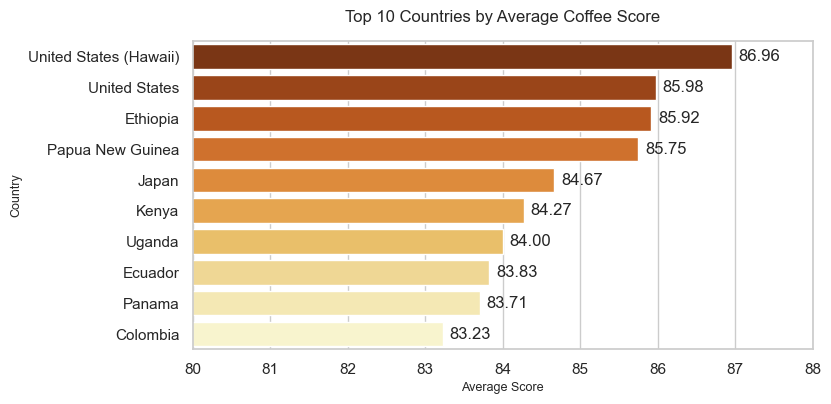

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#setting a style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))

#plot
# Creating the plot
plot = sns.barplot(x=top_countries.head(10).values, y=top_countries.head(10).index, palette="YlOrBr_r")

#label
plt.title('Top 10 Countries by Average Coffee Score', fontsize=12, pad=14)
plt.xlabel('Average Score', fontsize=9)
plt.ylabel('Country', fontsize=9)

#zooming in to the plot as the scores are close to eachother
plt.xlim(80, 88)

#adding numbers at end of wach bar
for i in plot.containers:
    plot.bar_label(i, fmt='%.2f', padding=5)

plt.show()

##### Interpretation
* The chart shows that Hawaii leads with an average score of 86.96 and Colombia at the tenth position with a score of 83.23

* By narrowing the x-axis scale to 80–88, the visualization reveals that the quality gap between the top 10 countries is very small, representing a highly competitive specialty market.

C:\Users\Akhil\AppData\Local\Temp\ipykernel_6572\76201580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=consistency_data.values, y=consistency_data.index, palette="mako")


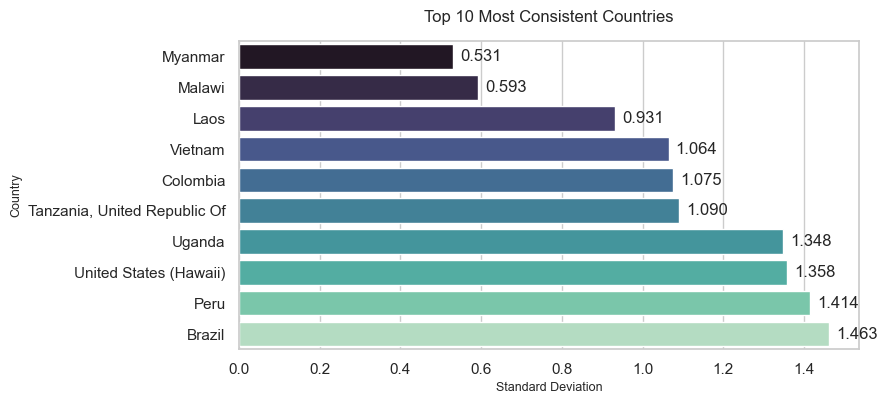

In [20]:
plt.figure(figsize=(8, 4))

consistency_data = filtered_coffee.groupby('Country')['Score'].std().sort_values().head(10)

plot = sns.barplot(x=consistency_data.values, y=consistency_data.index, palette="mako")
plt.title('Top 10 Most Consistent Countries', fontsize=12, pad=14)
plt.xlabel('Standard Deviation', fontsize=9)
plt.ylabel('Country', fontsize=9)

for i in plot.containers:
    plot.bar_label(i, fmt='%.3f', padding=5)

plt.show()

##### Interpretation
* Myanmar is the most consistent producer with a  low Standard Deviation

* This chart looks very different from the before plot, some of the "highest scoring" countries from the previous plot are not on this list.
 This means that quality and consistency are two different strengths in the coffee world.

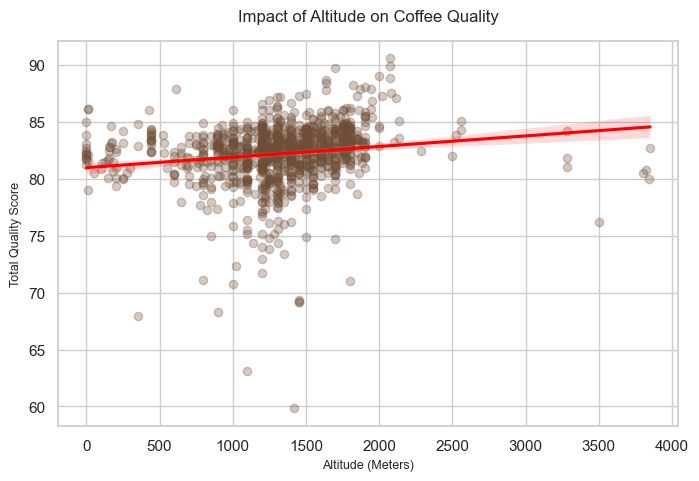

In [21]:
# Scatterplot
plt.figure(figsize=(8, 5))

sns.regplot(
    data=filtered_coffee, 
    x='Altitude', y='Score', 
    scatter_kws={'alpha':0.3, 'color':'#6F4E37'}, 
    line_kws={'color':'red'}
)

#Labels 
plt.title('Impact of Altitude on Coffee Quality', fontsize=12, pad=14)
plt.xlabel('Altitude (Meters)', fontsize=9)
plt.ylabel('Total Quality Score', fontsize=9)

plt.show()

##### Interpretation
* Looking at the chart, there is a high accumulation of dots between 1,000m and 2,000m. Even though they are at the same altitude, the scores are all over the place in between 70 and 90. This tells me that just being high up isn't enough to guarantee a good cup.
* There is only a slight upwards tilt to the regression line meaning altitude has only a small positive influence on the score.

#

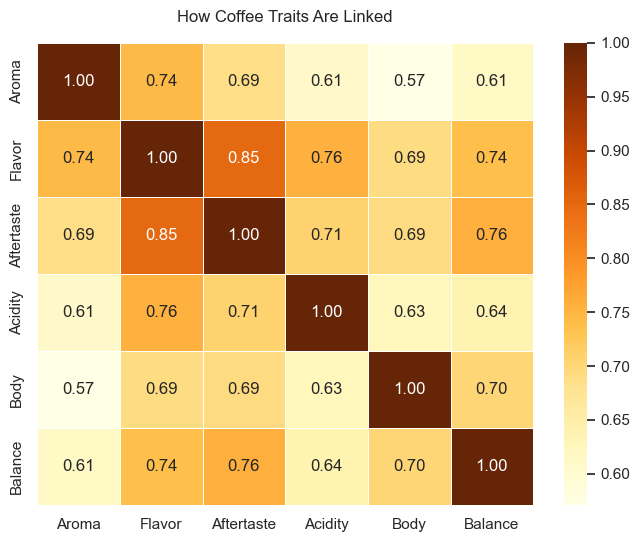

In [22]:

#Heatmap
plt.figure(figsize=(8, 6))

sensory_traits = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

#creating the correlation matrix for the heatmap
corr_matrix = filtered_coffee[sensory_traits].corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', fmt=".2f", linewidths=0.5)

plt.title('How Coffee Traits Are Linked', fontsize=12, pad=15)
plt.show()

##### Interpretation

* We can see that the flavor and aftertase have a strong connection as they are closer to 1, meaning if the flavor is good usually so is the aftertaste.
* Body and aroma have the lowest number, meaning the body value for a coffee could be high but the aroma woould not necessarily be high.

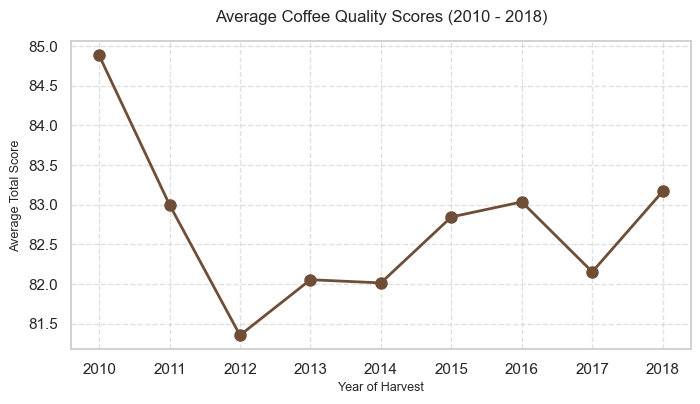

In [23]:
#Line graph
plt.figure(figsize=(8, 4))

plt.plot(yearly_trends.index, yearly_trends.values, 
         marker='o', color='#6F4E37', linewidth=2, markersize=8)

# Labels
plt.title('Average Coffee Quality Scores (2010 - 2018)', fontsize=12, pad=14)
plt.xlabel('Year of Harvest', fontsize=9)
plt.ylabel('Average Total Score', fontsize=9)

#making it to grids as a simple line is too distracting
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

##### Interpretation
* 2010 was the 'Golden Age' for the coffee's quality score, after that it dipped significantly.
* The quality is inconsitant throughout the years except 2013 and 2014.

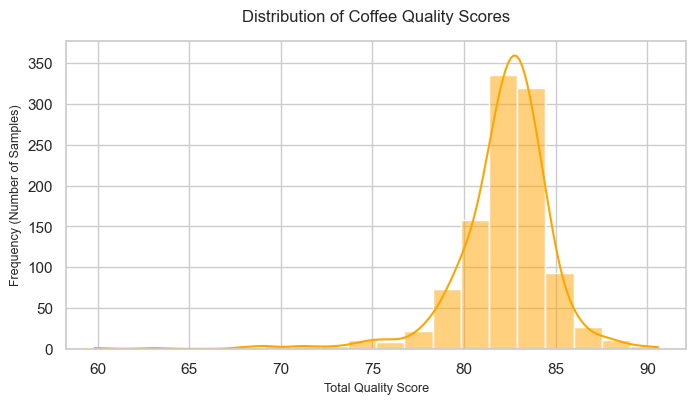

In [24]:
# Histogram
plt.figure(figsize=(8, 4))


sns.histplot(filtered_coffee['Score'], bins=20, kde=True, color='orange')

# Labels
plt.title('Distribution of Coffee Quality Scores', fontsize=12, pad=14)
plt.xlabel('Total Quality Score', fontsize=9)
plt.ylabel('Frequency (Number of Samples)', fontsize=9)

plt.show()

##### Interpretation
* The graph shows a very clear bell curve that peaks at the 82–84 point mark. This tells me that the  most of the coffee in this dataset is special quality coffee
* It is skewed to the left, meaning there are only a very few low scoring coffees (below 70)
* The smooth orange line (KDE) confirms that the data is very consistent; makes the average scores we calculated earlier more trustworthy.

# Conclusion
* Flavor turned out to be the biggest deal when it comes to high-scoring coffees. The correlation analysis showed that flavor had the strongest relationship with overall score, followed closely by aftertaste and balance. This makes sense because flavor is what you actually experience when drinking the coffee, so it's naturally going to matter the most to professional tasters.
* What surprised me was how consistent the data was. Most coffees in this dataset scored between 82 and 84 points, forming a nice bell curve. There weren't many truly bad coffees (below 70), which suggests this dataset represents coffees that already passed some quality threshold before being rated.
* One limitation I noticed is that this dataset doesn't include information about processing methods or roast levels, which could also play a role in final scores. Also, since most coffees here are already pretty good quality, I can't really say much about what makes truly terrible coffee terrible as the data just doesn't go that low.
* For coffee producers trying to get those outstanding ratings, the takeaway seems clear: focus on developing exceptional flavor profiles first, then work on aftertaste and balance. And if possible, grow at higher altitudes where the beans can develop more slowly and pick up more interesting characteristics.